In [24]:
import numpy as np

In [25]:
rng = np.random.RandomState(123)

In [26]:
d = 2
N = 10
mean = 5

In [27]:
x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

In [29]:
x = np.concatenate((x1, x2), axis=0)

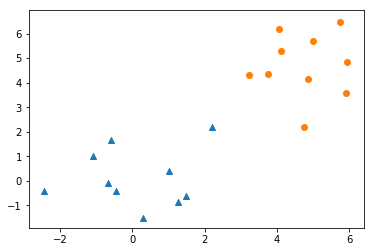

In [30]:
plt.scatter(x1[:, 0], x1[:, 1], marker='^')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.show()

### Tensorflow


In [31]:
xarr = np.concatenate((x1, x2), axis=0)

In [32]:
tarr = np.concatenate((-np.ones(N), np.ones(N)), axis=0)

In [33]:
import tensorflow as tf

In [34]:
from tensorflow.python.ops import nn

In [35]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
t = tf.placeholder(tf.float32)

In [36]:
a = tf.Variable([.9], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

- y - ax -b > 0 ... 1
- y - ax -b <= 0 ... -1

In [37]:
# disc = y - a*x - b
distance = (y - a*x -b)/tf.sqrt(a*a+1)

In [38]:
loss = -tf.reduce_sum(distance*t- 100*nn.relu(-distance*t))

In [39]:
train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [40]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong

In [41]:
all_losses = []
for epoch in range(1000):
    res_loss, res_train, res_a, res_b = sess.run([loss, train_op, a, b], {x: xarr[:, 0], y: xarr[:, 1], t: tarr})
    all_losses.append(res_loss)

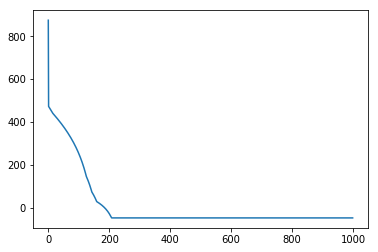

In [42]:
plt.plot(all_losses)
plt.show()

In [43]:
res_a, res_b

(array([-41.34333801], dtype=float32), array([ 98.28954315], dtype=float32))

In [44]:
def fit(x):
    return res_a[0]*x+res_b[0]

In [49]:
#xfit, yfit = (-2, 6), (fit(-2), fit(6))
xfit, yfit = (2, 2.5), (fit(2), fit(2.5))

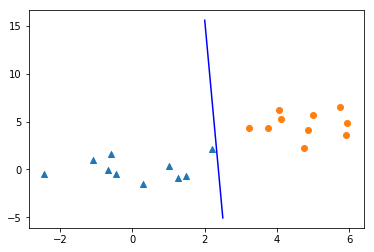

In [50]:
plt.scatter(x1[:, 0], x1[:, 1], marker='^')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.plot(xfit, yfit,'b')
plt.show()

### Obsolete cells

In [28]:
import math

In [29]:
def manual_loss(xs, ys, ts, a, b):
    loss = 0
    for i in range(len(xs)):
        dist = (ys[i]-a*xs[i]-b)/math.sqrt(a*a+1)
        loss += -dist*ts[i]
    return loss

In [31]:
manual_loss(xarr[:, 0], xarr[:, 1], tarr, res_a[0], res_b[0]+2)

-65.117124959780355

In [29]:
tf.reset_default_graph()
sess.close()